# 1.4. Matplotlib: plotting

## 1.4.1 Introduction

turn on the **matplotlib mode**
```
%matplotlib  ## for Ipython console
%matplotlib inline ## for Jupyter notebook
```

### 1.4.1.2 pyplot

Pyplot provides a procedural interface to the matplotlib object-oriented plotting library. It is modeled closed after matlab. Therefore, the majority of plotting commands in pyplot have Matlab analogs with similar arguments. Important commmands are explained with interactive examples.

```
from matplotlib import pyplot as plt
```

## 1.4.2 Simple plot
In this section, we want to draw the cosine and sine functions on the same plot. Starting from the default settings, we'll enrich the figure step by step to make it nicer.
First step is to get the data for the sine and cosine functions:

In [1]:
import numpy as np

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

### 1.4.2.1 Plotting with default settings
Hint: Documentation
* plot tutorial
* plot() command

Matplotlib comes with a set of default settings that allow customizing all kinds of properties. You can control the defaults of almost every property in matplotlib: figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties and so on.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(X, C)
plt.plot(X, S)

### 1.4.2.2 Instantiaing defaults
In the script below, we've instantiated (and commnented) all the figure settings that influence the appearence of the plot.
The settings have been explicitly set to their default values, but now you can interactively play with the values to explore thwir affect

Text(0,0,'$-\\pi$')
Text(0,0,'$-\\pi/2$')
Text(0,0,'$0$')
Text(0,0,'$+\\pi/2$')
Text(0,0,'$+\\pi$')
Text(0,0,'$-1$')
Text(0,0,'$+1$')


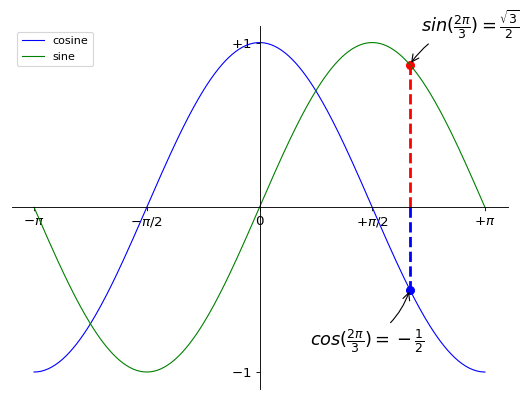

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure of size 8*6 inches, 80 dots pre ich
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1 * 1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

##gca stands for 'get current axis'
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

# Plot cosine with a bluee continueous line of width 1 (pixels)
plt.plot(X, C, color='blue', linewidth=1.0, linestyle='-', label='cosine')

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color='green', linewidth=1.0, linestyle='-', label='sine')

## add a legend
plt.legend(loc='upper left')

#plt.xlim(-4.0, 4.0)
#plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [ r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
#plt.ylim(-1.0, 1.0)
#plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.yticks([-1, 1], [r'$-1$',r'$+1$'])

## annotation some position
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# devil is in the details 
for label in ax.get_xticklabels() + ax.get_yticklabels():
    print label
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

plt.show()

#plt.savefig("exercise_2.png', dpi=72)


### 1.4.2.3 Changing colors and line widths
First step, ew want to have the cosine in blue and the sine in red and a slighty thicker line for both of them. We'll also slightly alter the figure size to make it more horizontal.

## 1.4.3 Figures, Subplots, Axes and Ticks
a "figure" in matplotlib means the whole window in the user interface. Within this figure there can be "subplots".
So far we have used implicit figure and axes creation. This is handy for fast plots. We can  have more control over the display using figure,subplot, and axes explicitly. while subplot positions the plots in a regular grid,axes allows free placement within the figure. both can be useful depending on your intention. We've already worked with figures and subplots without explicity calling them. When we call plot, matplotlib calls gca() to get the current axes and gca in turn calls gcf() to get the current figure. If there is none it calls figure() to make one, strictly speaking, to make a subplot(111). Let's look at the details.

### 1.4.3.1 Figures
A figure is the windows in the GUI that has "Figure #" as title. Figure are numbered starting from 1 as opposed to the normal Python way starting from 0. This is clearly MATLAB-style. There are several parameters that determine what the figure looks like:

| Argument | Default | Description |
|--|--|--|
|num|1|number of figure|
|figsize|figure.figsize|figure size in inches(width, height)|
|dpi|figure.dpi|resolution in dots per inch|
|facecolor|figure.facecolor|color of the drawing background|
|edgecolor|figure.edgecolor|color of edge around the drawing background|
|frameon|True|draw figure frame or not|

The defaults can be specified in the resouce file and will be used most of the time. Only the number of the figure is frequently changed.
As with other objects, you can set figure properties also setp or with the set_something methods.
When you work with the GUI you can close a figure by clicking on the x in the upper right corner. But you can close a figure programmatically by calling close. Depending on the argument it closes(1) the current figure(no argument), (2)a specific figure(figure number or figure instance as argument), or (3) all figures("all" as argument).


In [4]:
plt.close(1)  ## Closes figure 1

### 1.4.3.2 Subplots
With subplot you can arrange plots in a regular grid. You need to specify the number of rows and columns and the number of the plot. Note that the gridspec command is a more powerful alternative.
<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_subplot-horizontal_001.png"></img>
<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_subplot-vertical_001.png"></img>
<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_subplot-grid_001.png"></img>
<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_gridspec_001.png"></img>

### 1.4.3.3 Axes
Axes are very similar to subplots but allow placement of plots at any location in the figure. So if we want to put a smaller plot inside a bigger one we do so with axes.

Text(0.5,0.5,'axes([0.2, 0.2, 0.3, 0.3])')

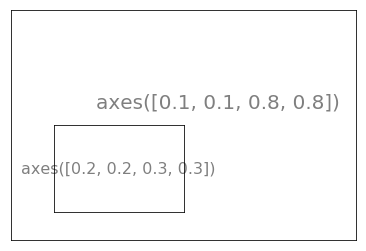

In [5]:
plt.axes([0.1, 0.1, 0.8, 0.8])
plt.xticks(())
plt.yticks(())
plt.text(0.6, 0.6, 'axes([0.1, 0.1, 0.8, 0.8])', ha='center', va='center', size=20, alpha=0.5)
plt.axes([0.2, 0.2, 0.3, 0.3])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'axes([0.2, 0.2, 0.3, 0.3])', ha='center', va='center', size=16, alpha=0.5)


Text(0.1,0.1,'axses([0.3, 0.3, 0.5, 0.5])')

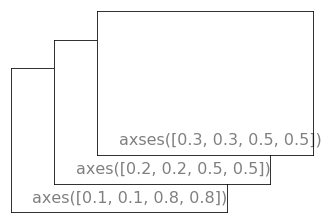

In [6]:
plt.clf()
plt.axes([0.1, 0.1, 0.5, 0.5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([0.1, 0.1, 0.8, 0.8])', ha='left', va='center', size=16, alpha=0.5)

plt.axes([0.2, 0.2, 0.5, 0.5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([0.2, 0.2, 0.5, 0.5])', ha='left', va='center', size=16, alpha=0.5)

plt.axes([0.3, 0.3, 0.5, 0.5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axses([0.3, 0.3, 0.5, 0.5])', ha='left', va='center',size=16, alpha=0.5)


### 1.4.3.4 Ticks
Well formatted ticks are an important part of publishing-ready figures. Matplotlib provides a totally configurable system for ticks.

Tick Locators
----

Tick locators control the positions of the ticks. They are set as follow:
```
ax = plt.gca()
ax.xaxis.set_major_locator(eval(locator))
```
There are several locators for different kind of requirements:
<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_ticks_001.png"></img>
All of these locators derive from the base class matplotlib.ticker.Locator. You can make your own locator deriving from it. Handling dates as ticks can be especially tricky. Therefore, matplotlib provides speciial locators in matplotlib.dates.

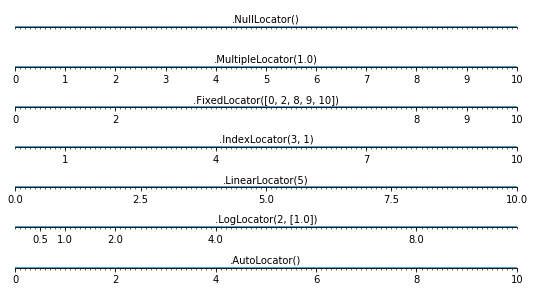

In [7]:
## Locators for tick on axis
import numpy as np
import matplotlib.pyplot as plt

def tickline():
    plt.xlim(0, 10), plt.ylim(-1, 1), plt.yticks([])
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.plot(np.arange(11), np.zeros(11))
    return ax

locators = [
            'plt.NullLocator()',
            'plt.MultipleLocator(1.0)',
            'plt.FixedLocator([0, 2, 8, 9, 10])',
            'plt.IndexLocator(3, 1)',
            'plt.LinearLocator(5)',
            'plt.LogLocator(2, [1.0])',
            'plt.AutoLocator()',
            ]

n_locators = len(locators)

size = 512, 40 * n_locators
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)

for i, locator in enumerate(locators):
    plt.subplot(n_locators, 1, i+1)
    ax = tickline()
    ax.xaxis.set_major_locator(eval(locator))
    plt.text(5, 0.3, locator[3:], ha='center')
    
plt.subplots_adjust(bottom=0.01, top=0.99, left=0.01, right=0.99)


## 1.4.4 Other Types of Plots: examples and exercises

### 1.4.4.1 Regular Plots
Starting from the code below, try to reproduce the graphic taking care of filled areas:

(-2.5, 2.5)

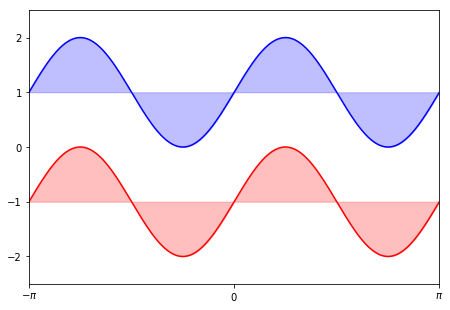

In [8]:
## Plot and filled plots
import numpy as np
import matplotlib.pyplot as plt

n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.plot(X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y+1, color='blue', alpha=0.25)

plt.plot(X, Y-1, color='red', alpha=1.00)
plt.fill_between(X, -1, Y-1, color='red', alpha=0.25)

plt.xlim(-np.pi, np.pi)
plt.xticks([-np.pi, 0, np.pi], [r'$-\pi$', r'$0$', r'$\pi$'])
plt.ylim(-2.5, 2.5)
#plt.yticks(())


### 1.4.4.1 Scatter Plots
Starting from the code below, try to reproduce the graphic taking care of marker size, color and transparency.

([], <a list of 0 Text yticklabel objects>)

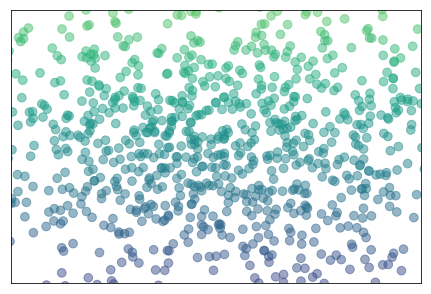

In [9]:
# Plotting a scatter of points
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=Y, alpha=0.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())


### 1.4.4.3 Bar Plots
Starting from the code below, try to reproduce the graphic by adding labels for red bars.

(-1.25, 1.25)

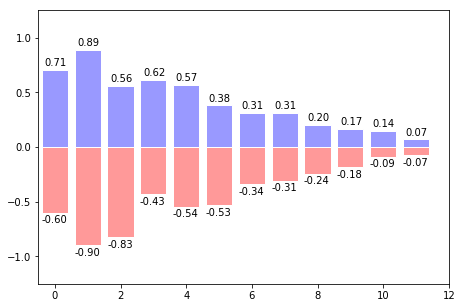

In [10]:
# Bar plots
import numpy as np
import matplotlib.pyplot as plt

n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0,n)
Y2 = (1- X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x+0.02, y+0.02, '%0.2f' %y, ha='center', va='bottom')

for x,y in zip(X, -Y2):
    plt.text(x-0.02, y-0.02, '%0.2f' %y, ha='center', va='top')

plt.xlim(-0.5, n)
#plt.xticks(())
plt.ylim(-1.25, 1.25)
#plt.yticks(())

### 1.4.4.4 contour Plots
Starting from the code below, try to reproduce the graphic taking care of the colormap.

/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


([], <a list of 0 Text yticklabel objects>)

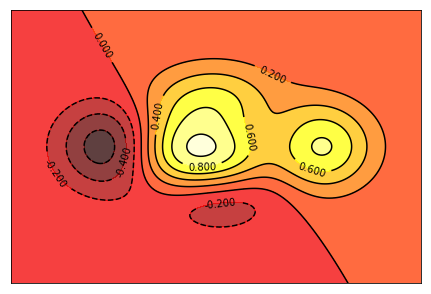

In [11]:
# Displaying the contours of a function
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X, Y), 8, alpha=0.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=0.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())

### 1.4.4.5 Imshow
Starting from the code below, try to reproduce the graphic taking care of colormap, image interpolation and origin.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


([], <a list of 0 Text yticklabel objects>)

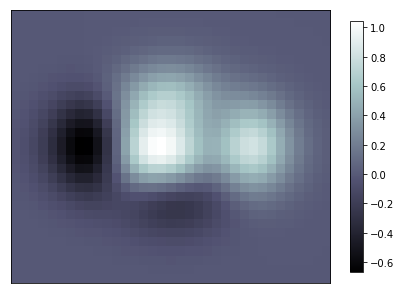

In [12]:
# Imshow elaborate
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

n = 10
x = np.linspace(-3, 3, 3.5*n)
y = np.linspace(-3, 3, 3.0*n)
X, Y = np.meshgrid(x,y)
Z = f(X, Y)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.imshow(Z, interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=0.92)

plt.xticks(())
plt.yticks(())

### 1.4.4.6 Pie Charts
Starting from the code below, try to reproduce the graphic taking care of colors and slices size.

(-1.1572778678432443,
 1.2028351604816532,
 -1.1558714839136948,
 1.1558714820146658)

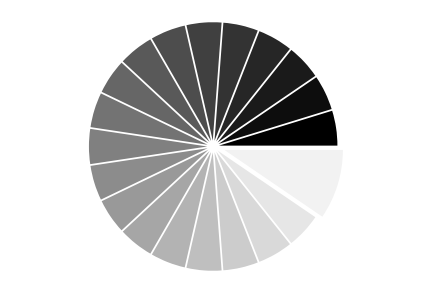

In [13]:
n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.pie(Z, explode=Z*0.05, colors=['%f' %(i/float(n)) for i in range(n) ])
plt.axis('equal')
#plt.xticks(())
#plt.yticks(())

### 1.4.4.7 Quiver Plots
Starting from the code above, try to reproduce the graphic taking care of colors and orientations.

([], <a list of 0 Text yticklabel objects>)

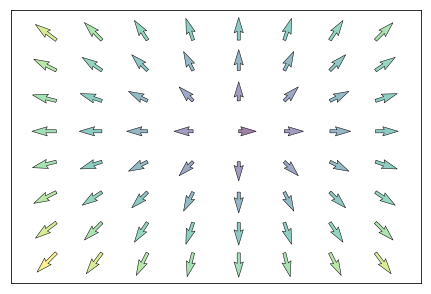

In [14]:
n = 8
X, Y = np.mgrid[0:n, 0:n]
T = np.arctan2(Y - n/2., X - n/2.)
R = 10 + np.sqrt((Y - n/2.0) **2 + ( X - n/2.0) **2)
U, V = R * np.cos(T), R * np.sin(T)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.quiver(X, Y, U, V, R, alpha=0.5)
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=0.5)

plt.xlim(-1, n)
plt.xticks(())
plt.ylim(-1, n)
plt.yticks(())

### 1.4.4.l8 Grides
reproduce the graphic taking care of line styles.

[]

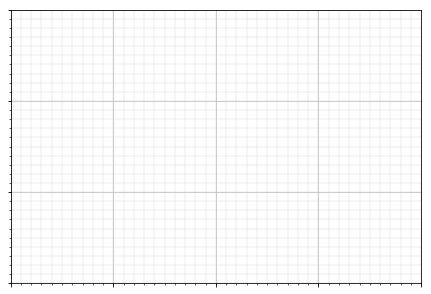

In [15]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95])

ax.set_xlim(0, 4)
ax.set_ylim(0, 3)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
ax.set_xticklabels([])
ax.set_yticklabels([])


### 1.4.4.9 Multi Plots

([], <a list of 0 Text yticklabel objects>)

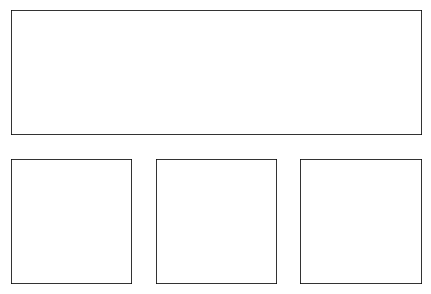

In [16]:
fig = plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

plt.subplot(2, 1, 1)
plt.xticks(())
plt.yticks(())

plt.subplot(2, 3, 4)
plt.xticks(())
plt.yticks(())

plt.subplot(2, 3, 5)
plt.xticks(())
plt.yticks(())

plt.subplot(2, 3, 6)
plt.xticks(())
plt.yticks(())


Text(0.5,0.5,'Axes 5')

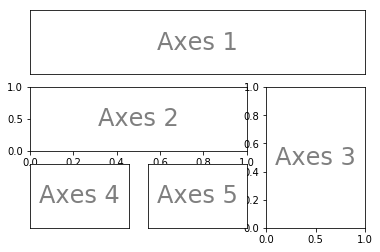

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(6,4))
G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 1', ha='center', va='center', size=24, alpha=0.5)

axes_2 = plt.subplot(G[1, :-1])
plt.text(0.5, 0.5, 'Axes 2', ha='center', va='center', size=24, alpha=0.5)

axes_3 = plt.subplot(G[1:, -1])
plt.text(0.5, 0.5, 'Axes 3', ha='center', va='center', size=24, alpha=0.5)

axes_4 = plt.subplot(G[2, 0])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 4', ha='center', va='center', size=24, alpha=0.5)

axes_5 = plt.subplot(G[2, 1])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 5', ha='center', va='center', size=24, alpha=0.5)

### 1.4.4.10 Polar Axis

[]

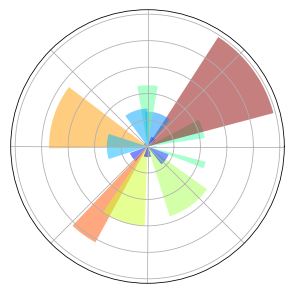

In [18]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi/N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)
    
ax.set_xticklabels([])
ax.set_yticklabels([])


### 1.4.4.11 3D Plots

(-2, 2)

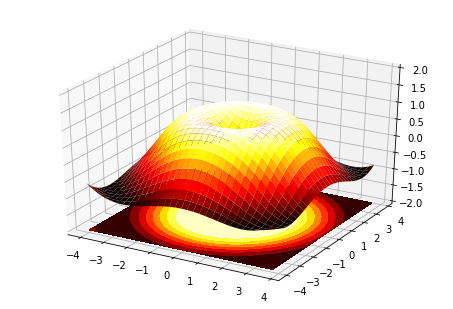

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

Text(-0.05,0.975,'Plot 2D or 3D data')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family [u'Lint McCree Intl BB'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


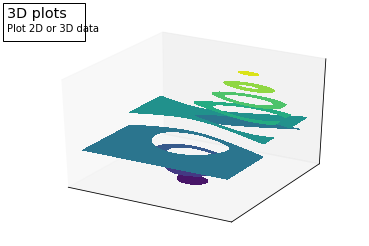

In [20]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contourf(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.xticks(())
plt.yticks(())
ax.set_zticks(())

ax.text2D(-0.05, 1.05, '3D plots   \n',
         ha='left', va='top', bbox=dict(facecolor='white',alpha=1.0),
         family='Lint McCree Intl BB', size='x-large',transform=plt.gca().transAxes)
ax.text2D(-0.05, 0.975, 'Plot 2D or 3D data', ha='left', va='top',
         family='Lint McCree Intl BB', size='medium', transform=plt.gca().transAxes)


In [21]:
### 1.4.4.12 Text

([], <a list of 0 Text yticklabel objects>)

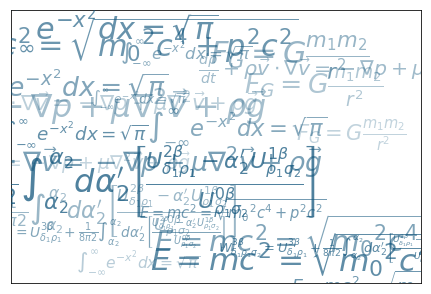

In [22]:
eqs = []
eqs.append((r'$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right] $'))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \
             \mu\nabla^2 \vec{v} +\rho \vec{g} $"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))

plt.axes([0.025, 0.025, 0.95, 0.95])

for i in range(24):
    index = np.random.randint(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 32)
    x, y = np.random.uniform(0, 1, 2)
    alpha = np.random.uniform(0.25, 0.75)
    plt.text(x, y, eq, ha='center', va='center', color='#11557c', alpha=alpha, transform=plt.gca().transAxes, fontsize=size, clip_on=True)
    
plt.xticks(())
plt.yticks(())

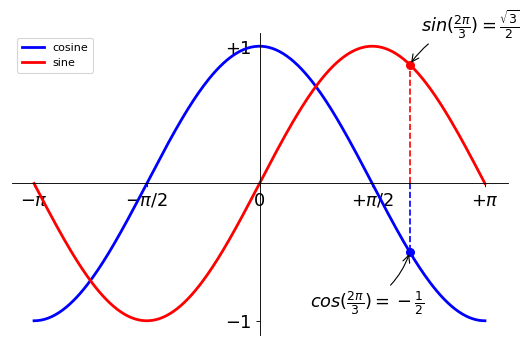

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, 1],
          [r'$-1$', r'$+1$'])

plt.legend(loc='upper left')

t = 2*np.pi/3
plt.plot([t, t], [0, np.cos(t)],
        color='blue', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(10, 30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t], [0, np.sin(t)],
        color='red', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.sin(t), ], 50, color ='red')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)),
            xycoords='data', xytext=(-90, -50),
            textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

#### Boxplot

Text(-0.04,0.98,'\n Make a box and whisker plot')

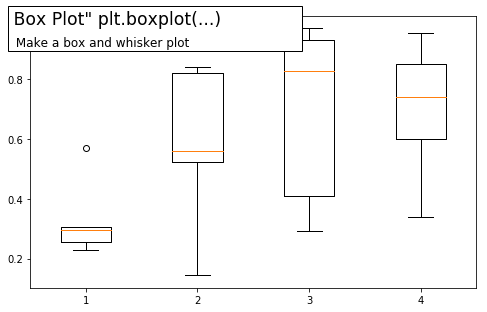

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
axes = plt.subplot(111)

n = 5
Z = np.zeros((n, 4))
X = np.linspace(0, 2, n, endpoint=True)
Y = np.random.random((n, 4))
plt.boxplot(Y)

# Add a title and a box around it 
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, 
                           height=0.165, clip_on=False,
                           boxstyle='square,pad=0', zorder=3,
                           facecolor='white', alpha=1.0, transform=plt.gca().transAxes))
plt.text(-0.05, 1.02, ' Box Plot" plt.boxplot(...)\n', ha='left', va='top', size='xx-large', transform=axes.transAxes)
plt.text(-0.04, 0.98, '\n Make a box and whisker plot', ha='left', va='top', size='large',transform=axes.transAxes)

(-2.5, 2.5)

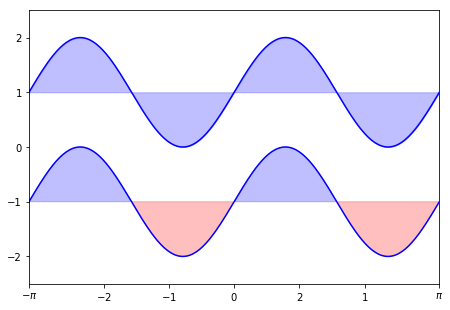

In [25]:
import numpy as np
import matplotlib.pyplot as plt

n = 256
x = np.linspace(-np.pi, np.pi, n, endpoint=True)
y = np.sin(2 * x)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.plot(x, y + 1, color='blue', alpha=1.00)
plt.fill_between(x, 1, y+1, color='blue', alpha=0.25)

plt.plot(x, y - 1, color='blue', alpha=1.00)
plt.fill_between(x, -1, y-1, (y-1)>-1, color='blue', alpha=0.25)
plt.fill_between(x, -1, y-1, (y-1)<-1, color='red', alpha=0.25)

plt.xlim(-np.pi, np.pi)
plt.xticks([-np.pi, -2, -1, 0, 1, 2, np.pi], [r'$-\pi$', r'$-2$', r'$-1$', r'$0$', r'$2$', r'$1$', r'$\pi$'])
plt.ylim(-2.5, 2.5)


## 1.4.6 Quick references
### 1.4.6.1 Line properties

### 1.4.6.2 Line styles

### 1.4.6.3 Markers

### 1.4.6.4 Colormaps



([], <a list of 0 Text yticklabel objects>)

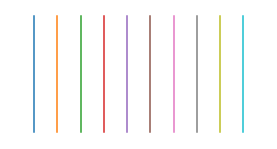

In [26]:
# the colors matplotlib line plots

import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0.1, 1, 8], frameon=False)

for i in range(1, 11):
    plt.plot([i, i], [0, 1], lw=1.5)
    
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

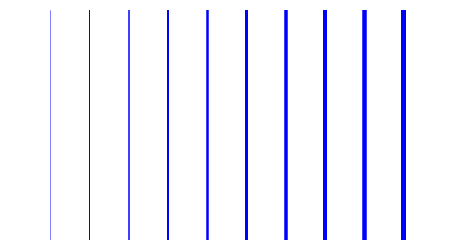

In [27]:
## linewidth
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0.1, 1, 0.8], frameon=False)

for i in range(1, 11):
    plt.plot([i, i], [0, 1], color='blue', lw=i/2.)

plt.xlim(0, 11)
plt.ylim(0, 1)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

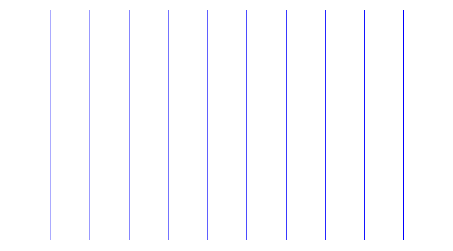

In [28]:
## Alpha: transparency
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0.1, 1, 0.8], frameon=False)

for i in range(1, 11):
    plt.axvline(i, lw=1, color='blue', alpha=0.25 + 0.75*i/10.)
    
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

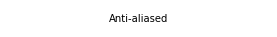

In [29]:
## aliased versus anti-aliased
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)

plt.axes([0, 0, 1, 1], frameon=False)
#plt.rcParams['text.antialiased'] = False
#plt.text(0.5, 0.5, 'Aliased', ha='center', va='center')
plt.rcParams['text.antialiased'] = True
plt.text(0.5, 0.5, 'Anti-aliased', ha='center', va='center')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(())
plt.yticks(())


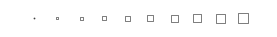

In [30]:
# Marker size
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)

for i in range(1, 11):
    plt.plot([i, ], [1, ], 's', markersize=i, markerfacecolor='w', markeredgewidth=0.5, markeredgecolor='k')
    
    plt.xlim(0, 11)
    plt.xticks(())
    plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

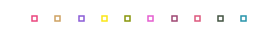

In [31]:
import numpy as np
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0]/float(dpi), size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)

for i in range(1, 11):
    r, g, b = np.random.uniform(0, 1, 3)
    plt.plot([i, ], [1, ], 's', markersize=5, markerfacecolor='w',
            markeredgewidth=1.5, markeredgecolor=(r, g, b,1))

plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

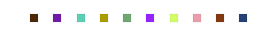

In [32]:
## Marker face colcor
import numpy as np
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0]/float(dpi), size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)

for i in range(1, 11):
    r, g, b = np.random.uniform(0, 1, 3)
    plt.plot([i, ], [1, ], 's', markersize=8, markerfacecolor=(r, g, b, 1), markeredgewidth=0.1, markeredgecolor=(0, 0, 0, 0.5))

plt.xlim(0, 11)
plt.xticks(())
plt.yticks(()) 
    

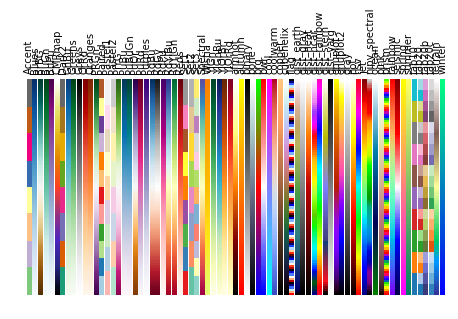

In [33]:
## Colormaps
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=False)
a = np.outer(np.arange(0, 1, 0.01), np.ones(10))

plt.subplots_adjust(top=0.8, bottom=0.05, left=0.01, right=0.99)
maps = [m for m in plt.cm.datad if not m.endswith('_r')]
maps.sort()
l = len(maps) + 1

for i, m in enumerate(maps):
    plt.subplot(1, l, i+1)
    plt.axis('off')
    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin='lower')
    plt.title(m, rotation=90, fontsize=10, va='bottom')


([], <a list of 0 Text yticklabel objects>)

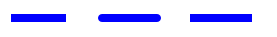

In [34]:
## Solid cap style
import numpy as np
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize = size[0]/float(dpi), size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)

plt.plot(np.arange(4), np.ones(4), color='blue', linewidth=8, solid_capstyle='butt')
plt.plot(5 + np.arange(4), np.ones(4), color='blue', linewidth=8, solid_capstyle='round')
plt.plot(10 + np.arange(4), np.ones(4), color='blue', linewidth=8, solid_capstyle='projecting')

plt.xlim(0, 14)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

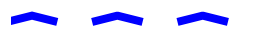

In [35]:
size = 256, 16
dpi = 72.0
figsize = size[0]/float(dpi), size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
plt.axes([0, 0, 1, 1], frameon=False)

plt.plot(np.arange(3), [0, 1, 0], color='blue', linewidth=8, solid_joinstyle='miter')
plt.plot(4+np.arange(3), [0, 1, 0], color='blue', linewidth=8, solid_joinstyle='bevel')
plt.plot(8+np.arange(3), [0, 1, 0], color='blue', linewidth=8, solid_joinstyle='round')

plt.xlim(0, 12)
plt.ylim(-1, 2)
plt.xticks(())
plt.yticks(())


In [36]:
plt.plot?

([], <a list of 0 Text yticklabel objects>)

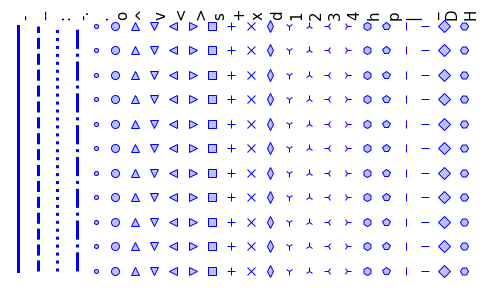

In [37]:
## Linestyles
def linestyle(ls, i):
    X = i * 0.5 * np.ones(11)
    Y = np.arange(11)
    plt.plot(X, Y, ls, color=(0.0, 0.0, 1, 1), lw=3, ms=8, mfc=(0.75, 0.75, 1, 1), mec=(0, 0, 1, 1))
    plt.text(0.5*i, 10.25, ls, rotation=90, fontsize=15, va='bottom')

linestyles = [ '-', '--', ':', '-.', '.', 'o', '^', 'v', '<', '>', 's', '+', 'x', 'd', '1', '2', '3', '4', 'h', 'p', '|', '_', 'D', 'H']
n_lines = len(linestyles)

size = 20 * n_lines, 300
dpi = 72.0
figsize = size[0]/float(dpi), size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0.01, 1, 0.9], frameon=False)

for i, ls in enumerate(linestyles):
    linestyle(ls, i)
    
plt.xlim(-0.2, 0.2 + 0.5*n_lines)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

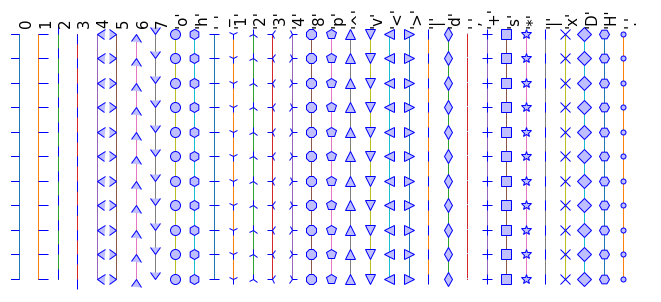

In [39]:
## Markers
def marker(m, i):
    X = i * 0.5 * np.ones(11)
    Y = np.arange(11)
    
    plt.plot(X, Y, lw=1, marker=m, ms=10, mfc=(0.75, 0.75, 1, 1), mec=(0, 0, 1, 1))
    plt.text(0.5*i, 10.25, repr(m), rotation=90, fontsize=15, va='bottom')
    
markers = [0, 1, 2, 3, 4, 5, 6, 7, 'o', 'h', '_', '1', '2', '3', '4', '8', 'p', '^', 'v', '<', '>', '|', 'd', ',', '+', 's', '*', '|', 'x', 'D', 'H', '.']
n_markers = len(markers)
size = 20* n_markers, 300
dpi = 72.0
figsize = size[0]/float(dpi), size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
plt.axes([0, 0.01, 1, 0.9], frameon=False)

for i, m in enumerate(markers):
    marker(m, i)
    
plt.xlim(-0.2, 0.2 + 0.5 * n_markers)
plt.xticks(())
plt.yticks(())


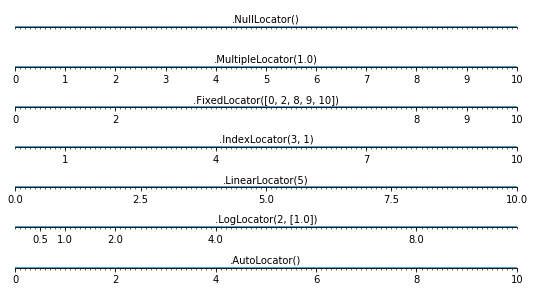

In [49]:
## Locators for tick on axis
def tickline():
    plt.xlim(0, 10), plt.ylim(-1, 1), plt.yticks([])
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.plot(np.arange(11), np.zeros(11))
    
    return ax
    
locators = [
            'plt.NullLocator()',
            'plt.MultipleLocator(1.0)',
            'plt.FixedLocator([0, 2, 8, 9, 10])',
            'plt.IndexLocator(3, 1)',
            'plt.LinearLocator(5)',
            'plt.LogLocator(2, [1.0])',
            'plt.AutoLocator()',
        ]

n_locators = len(locators)
size = 512, 40 * n_locators
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)

for i, locator in enumerate(locators):
    plt.subplot(n_locators, 1, i+1)
    ax = tickline()
    ax.xaxis.set_major_locator(eval(locator))
    plt.text(5, 0.3, locator[3:], ha='center')
    
plt.subplots_adjust(bottom=0.01, top=0.99, left=0.01, right=0.99)


Text(-0.2,1.01,'\n\n Plot anything using polar axis')

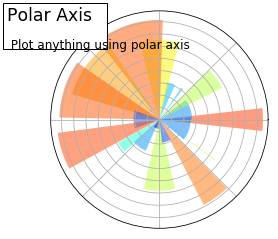

In [57]:
## Plotting in polar, decorated
plt.subplot(1, 1, 1, polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)
    
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

plt.text(-0.2, 1.02, 'Polar Axis  \n', ha='left', va='top', size='xx-large', bbox=dict(facecolor='white', alpha=1.0),transform=plt.gca().transAxes)
plt.text(-0.2, 1.01, '\n\n Plot anything using polar axis', ha='left', va='top', size='large', transform=plt.gca().transAxes)


Text(0.05,0.87,' Plot 2D or 3D data')

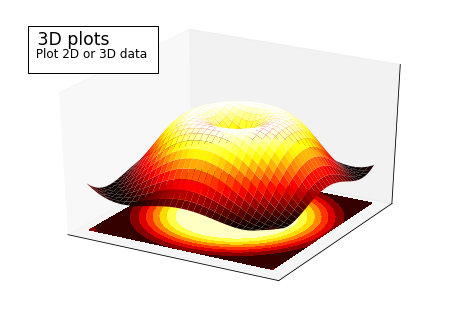

In [70]:
## 3D plotting vignette
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)
plt.xticks(())
plt.yticks(())
ax.set_zticks(())

ax.text2D(0.05, 0.93, ' 3D plots        \n', ha='left', va='top', size='xx-large', bbox=dict(facecolor='white', alpha=1.0), transform=plt.gca().transAxes)
ax.text2D(0.05, 0.87, ' Plot 2D or 3D data', ha='left', va='top', size='large', transform=plt.gca().transAxes)


Text(-0.05,1.01,'\n\n   Plot lines and/or markers ')

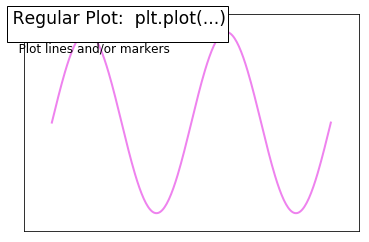

In [78]:
## Plot example vignette
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
n = 256
X = np.linspace(0, 2, n)
Y = np.sin(2 * np.pi * X)

plt.plot(X, Y, lw=2, color='violet')

plt.xlim(-0.2, 2.2)
plt.xticks(())
plt.ylim(-1.2, 1.2)
plt.yticks(())

# add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, height=0.165, 
                          clip_on=False, boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0, transform=plt.gca().transAxes))
plt.text(-0.05, 1.02, ' Regular Plot:  plt.plot(...) \n', ha='left', va='top', size='xx-large', transform=plt.gca().transAxes)
plt.text(-0.05, 1.01, '\n\n   Plot lines and/or markers ', horizontalalignment='left', verticalalignment='top', size='large', transform=plt.gca().transAxes)



[]

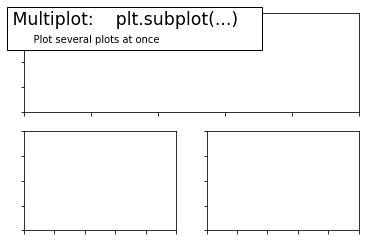

In [85]:
## Multiple plots vignette
import matplotlib.pyplot as plt

ax = plt.subplot(2, 1, 1)
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add a title and a box around it 
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.62), width=0.76, height=0.44, clip_on=False,
                           boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0,
                           transform=plt.gca().transAxes))

plt.text(-0.05, 1.02, ' Multiplot:    plt.subplot(...) \n', ha='left', va='top', size='xx-large', transform=ax.transAxes)
plt.text(-0.01, 1.01, '\n\n    Plot several plots at once  ', ha='left', va='top', transform=ax.transAxes)

ax = plt.subplot(2, 2, 3)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = plt.subplot(2, 2, 4)
ax.set_xticklabels([])
ax.set_yticklabels([])



([], <a list of 0 Text yticklabel objects>)

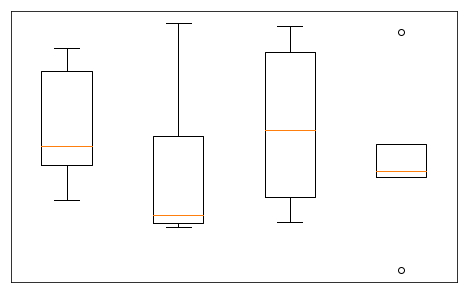

In [94]:
## Boxplot with matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
axes = plt.subplot(111)

n = 5
Z = np.zeros((n, 4))
X = np.linspace(0, 2, n, endpoint=True)
Y = np.random.random((n, 4))
plt.boxplot(Y)

plt.xticks(())
plt.yticks(())

Text(-0.05,1.01,'\n\n    Make a scatter plot of x versus y')

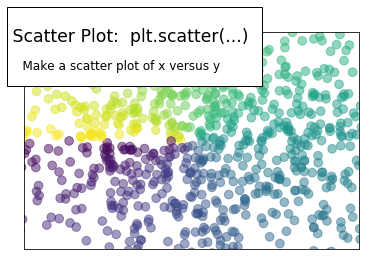

In [110]:
## Plot scatter decorated
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)

T = np.arctan2(Y, X)

plt.scatter(X, Y, s=75, c=T, alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())

## Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.75), width=0.76, height=0.365, clip_on=False, boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0, transform=ax.transAxes))
plt.text(-0.05, 1.02, ' Scatter Plot:  plt.scatter(...)', ha='left', va='top', size='xx-large', transform=ax.transAxes)
plt.text(-0.05, 1.01, '\n\n    Make a scatter plot of x versus y', ha='left', va='top', size='large', transform=ax.transAxes)

Text(-0.05,1.01,'\n    Make a pie chart of an array ')

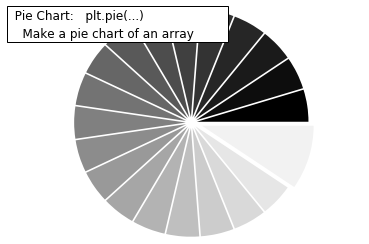

In [114]:
## Pie chart vignette
n = 20
X = np.ones(n)
X[-1] *= 2
plt.pie(X, explode=X*0.05, colors = ['%f' %(i/float(n)) for i in range(n)])

fig =plt.gcf()
w, h = fig.get_figwidth(), fig.get_figheight()
r = h / float(w)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5*r, 1.5*r)
plt.xticks(())
plt.yticks(())

# Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, height=.165, clip_on=False,
                           boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0,
                           transform=ax.transAxes))
ax.text(-0.05, 1.02, '  Pie Chart:   plt.pie(...)  \n', ha='left', va='top',size='large', transform=ax.transAxes)
plt.text(-0.05, 1.01, '\n    Make a pie chart of an array ', ha='left', va='top', size='large', transform=ax.transAxes)

Text(-0.05,1.01,' \n Make a bar plot with rectangles  ')

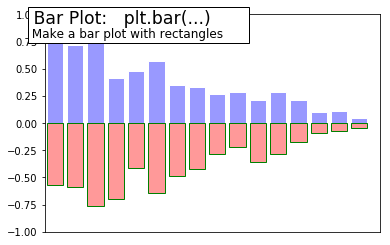

In [117]:
## Bar plot advanced
import numpy as np
import matplotlib.pyplot as plt

n = 16
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
plt.bar(X, Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='green')
plt.xlim(-0.5, n)
plt.xticks(())
plt.ylim(-1, 1)
plt.xticks(())

# Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, height=0.165, clip_on=False,
                           boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0, transform=ax.transAxes))
ax.text(-0.05, 1.02, ' Bar Plot:   plt.bar(...)  \n', ha='left', va='top', size='xx-large', transform=ax.transAxes)
ax.text(-0.05, 1.01, ' \n Make a bar plot with rectangles  ', ha='left', va='top', size='large', transform=ax.transAxes)


Text(-0.05,1.01,'\n   Plot a 2-D field of arrows')

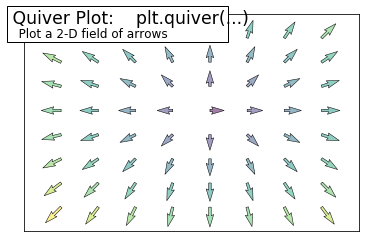

In [119]:
## Plotting quiver decorated
import numpy as np
import matplotlib.pyplot as plt

n = 8
X, Y = np.mgrid[0:n, 0:n]
T = np.arctan2(Y - n/2.0, X - n / 2.) 
R = 10 + np.sqrt((Y - n / 2.) ** 2 + ( X - n / 2.) ** 2)
U, V = R * np.cos(T), R * np.sin(T)

plt.quiver(X, Y, U, V, R, alpha=0.5)
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=0.5)

plt.xlim(-1, n)
plt.xticks(())
plt.ylim(-1, n)
plt.yticks(())

# Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, height=0.165, clip_on=False,
                           boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0, transform=ax.transAxes))
plt.text(-0.05, 1.02, ' Quiver Plot:    plt.quiver(...)  \n', ha='left', va='top', size='xx-large', transform=ax.transAxes)
plt.text(-0.05, 1.01, '\n   Plot a 2-D field of arrows', ha='left', va='top', size='large', transform=ax.transAxes)


Text(-0.05,1.01,'\n  Display an image to current axes')

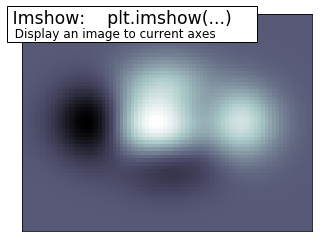

In [127]:
## Imshow demo
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (1 - x/2 + x ** 5 + y ** 3) * np.exp(-x**2 - y **2)

n = 10
x = np.linspace(-3, 3, 8 * n)
y = np.linspace(-3, 3, 6 * n)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.imshow(Z, interpolation='nearest', cmap='bone', origin='lower')
plt.xticks(())
plt.yticks(())

## Add a title and a box around it 
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.86, height=0.165, clip_on=False,
                           boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0, transform=ax.transAxes))
plt.text(-0.05, 1.02, ' Imshow:    plt.imshow(...)', ha='left', va='top', size='xx-large', transform=ax.transAxes)
ax.text(-0.05, 1.01, '\n  Display an image to current axes', ha='left', va='top', size='large', transform=ax.transAxes)


Text(-0.05,1.01,'\n  Draw contour lines and filled contours ')

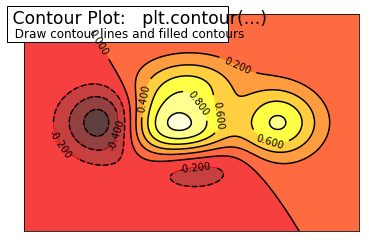

In [133]:
## Display the contours of a function
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (1 - x/2 + x **5 + y **3) * np.exp(-x **2 - y **2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=0.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, colors='black', lw=0.5)
plt.clabel(C, inline=1, fontsize=10)
plt.xticks(())
plt.yticks(())

# Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, height=0.165, clip_on=False,
                           boxstyle='square,pad=0', zorder=3, facecolor='white', alpha=1.0, transform=ax.transAxes))
plt.text(-0.05, 1.02, ' Contour Plot:   plt.contour(...)\n', ha='left', va='top', size='xx-large', transform=ax.transAxes)
plt.text(-0.05, 1.01, '\n  Draw contour lines and filled contours ', ha='left', va='top', size='large', transform=ax.transAxes)


Text(-0.05,1.01,'\n\n    Draw ticks and grid  ')

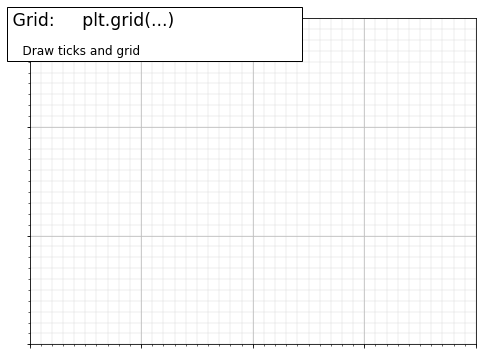

In [5]:
## Grid elaborate
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(8, 6), dpi=72.0, facecolor='white')
axes = plt.subplot(111)
axes.set_xlim(0, 4)
axes.set_ylim(0, 3)

axes.xaxis.set_major_locator(MultipleLocator(1.0))
axes.xaxis.set_minor_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(1.0))
axes.yaxis.set_minor_locator(MultipleLocator(0.1))

axes.grid(which='major', axis='x', lw=0.75, linestyle='-', color='0.75')
axes.grid(which='minor', axis='x', lw=0.25, linestyle='-', color='0.75')
axes.grid(which='major', axis='y', lw=0.75, linestyle='-', color='0.75')
axes.grid(which='minor', axis='y', lw=0.25, linestyle='-', color='0.75')

axes.set_xticklabels([])
axes.set_yticklabels([])

## Add a title and a box  around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, height=0.165, clip_on=False, boxstyle='square,pad=0',
                           zorder=3, facecolor='white', alpha=1.0, transform=ax.transAxes))
plt.text(-0.05, 1.02, ' Grid:     plt.grid(...) \n', ha='left', va='top', size='xx-large', transform=ax.transAxes)
plt.text(-0.05, 1.01, '\n\n    Draw ticks and grid  ', ha='left', va='top', size='large', transform=ax.transAxes)

Text(-0.05,1.01,'\n  Draw any kind of text')

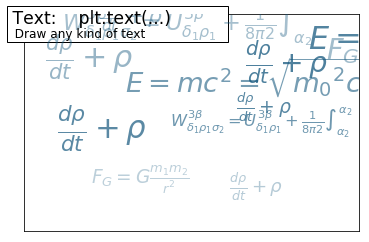

In [15]:
## Text printing decorated
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xticks(())
plt.yticks(())

eqs = []
eqs.append((r'$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} $'))
eqs.append((r'$\frac{d\rho}{d t} + \rho $'))
eqs.append((r'$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$'))
eqs.append((r'$F_G = G\frac{m_1m_2}{r^2}$'))

for i in range(24):
    index = np.random.randint(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 32)
    x, y = np.random.uniform(0, 1, 2)
    alpha = np.random.uniform(0.25, 0.75)
    plt.text(x, y, eq, ha='center', va='center', color='#11557c', alpha=alpha, transform=axes.transAxes, fontsize=size, clip_on=True)
    
## Add a title and a box around it 
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, 0.87), width=0.66, height=0.165, clip_on=False, boxstyle='square,pad=0',
                           zorder=3, facecolor='white', alpha=1.0, transform=ax.transAxes))
plt.text(-0.05, 1.02, ' Text:    plt.text(...)  \n', ha='left', va='top', size='xx-large', transform=ax.transAxes)
plt.text(-0.05, 1.01, '\n  Draw any kind of text', ha='left', va='top', size='large', transform=ax.transAxes)
